In [349]:
import pandas as pd
df = pd.read_csv (r'loans_full_schema.csv')
df.head(2)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0


1. In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course. 

In order to make successful ML models, first step is to have concrete infrastructures to collect, store and prepare data as needed. 
Business requirements i.e., the scope should be clear. Understand the business situation (problem), find the solutions(opportunities on what percenatge of this makes the difference)and make changes(actions on improving the situations).
Once the requirements are clear collect the sample dataset and train the model to detect patterns. Perform model performance measurements on unseen dataset. 
Target variables must be clearly defined before modeling.  
When the data is not accurate, it is not at all good to perform ML models. And not at all advisable to deploy Low precision, low recall and large regression errored models. Need to make sure the amount of risk business is willing to accept if something goes wrong. 
Risky to deploy models without enough testing window/late testing. 

2. Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques.

In [ ]:
#homeownership column is ordinal, so it can be encoding 
homeownership_col = {'MORTGAGE': 1, 'RENT': 2}
df['homeownership']=df['homeownership'].map(homeownership_col)
df.head(1)

In [ ]:
#nominal
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()
df['verified_income']=class_labels.fit_transform(df['verified_income'].values)
df.head(5)

In [ ]:
#one hot-encoding on categorical data
df = pd.get_dummies(df[['initial_listing_status', 'loan_status','disbursement_method']])
df

3. Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
print(correlation_matrix)

In [ ]:

corr_pairs = correlation_matrix.unstack()
#print(corr_pairs)
sorted_corr_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_corr_pairs)

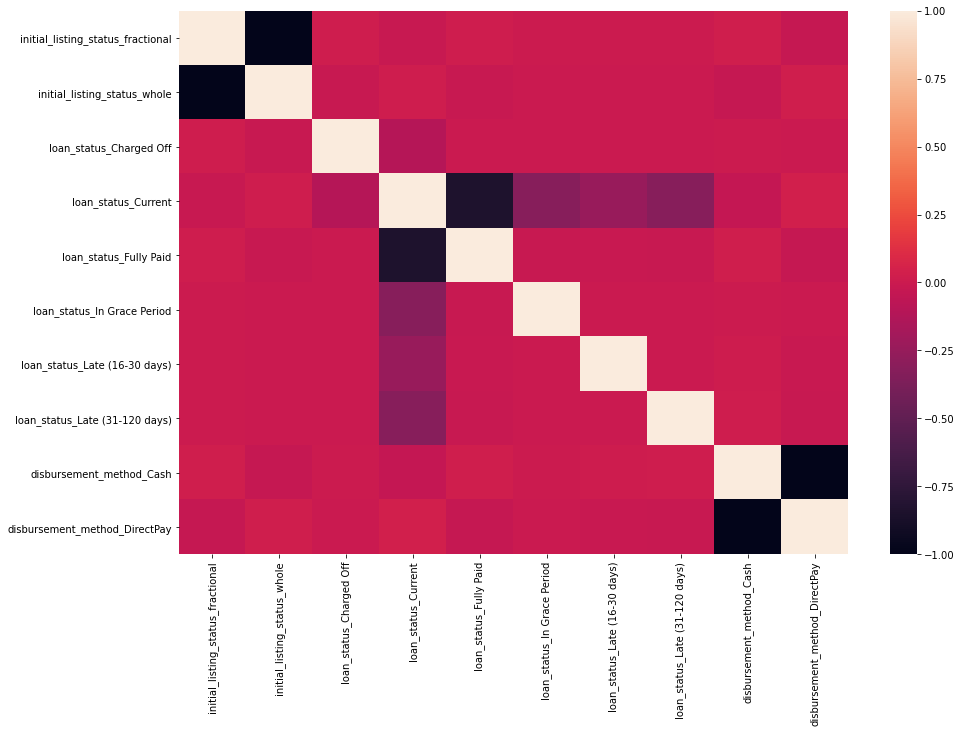

In [363]:
f_size = plt.figure(figsize=(15, 10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=False)
#annot gives the correlation coeffient value in each grid
plt.show()

* All elements in the diagonal are equal to 1, i.e., it represents correlation of a variable to itself. 
Features/ columns that are close to 1.0 indicates strong positive corelation between them like emp_length to emp_length columns. 
* Columns such as num_satisfactory_accounts, num_accounts_120d_past_due that are close to 0.0 are neither positive nor negative. That is they don't have any correlation between them.
These two features are independent to each other. 
* Our correlation matrix is symmetric, i.e., number of rows is equal to number of columns. 


4. Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes. 

In [ ]:
bin_size = len(df['loan_amount'])
#Rice's rule to find bin size - Rice’s rule is defined as: (cube root of the number of observations) * 2.
def cube_root(x):
    return x**(1/3)
my_bin = int(cube_root(bin_size)*2)
my_bin

Bin size is usually based on how to want to present the data visually, like if we select larger bin sizes then width gets narrowed. 
If the bin size is small, lets say for ex: bins=5, then plot will be too broader and there is nothing much to capture.
Bin size should be optimal to make it visually good. 
Here I used rice rule to calculate the optimal bin size that works for the data.
With optimal bin size, it is visually clear to check the distribution in loan amount. 
Whereas with low bin sizes, like 5, 10, distribution is compact. 

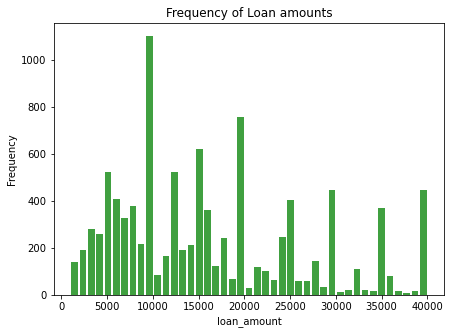

In [265]:
import matplotlib.pyplot as plt
%matplotlib inline
#prints plot here once the code is executed
plt.figure(figsize=[7,5])
n, bins, patches = plt.hist(x=df["loan_amount"], bins=my_bin, color='green', alpha=0.75, rwidth=0.8)
plt.xlabel('loan_amount')
plt.ylabel('Frequency')
plt.title("Frequency of Loan amounts")
plt.show()

5. Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 
Is there a better way to do this than with a lambda? 
Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 

In [ ]:
import pandas as pd
df = pd.read_csv (r'loans_full_schema.csv')
df.head(2)

In [387]:
#Created list based on regions
pacific = ['AL','CA','HI','WA','OR','AZ', 'CO', 'MT', 'ID', 'NV', 'NM', 'UT', 'WY']
plains= ['IA', 'KS','MN', 'MO', 'NE','ND','SD']
northeast=['CT', 'ME', 'MA','NH', 'RI', 'VT', 'NJ', 'NY', 'PA']
south = ['FL','DE', 'MD', 'GE', 'NC', 'SC', 'VA','DC','WV','AL','KY','MS','TN','AR','LA', 'TX','OK']
midwest = ['IL', 'IN','MI', 'OH','WI']  


In [388]:
tic1=time.perf_counter()
def reg_func(r):
    for each in df['state']:
        for p in pacific:
            if each==p:
                return pd.Series("pacific")
        for l in plains:
            if each==l:
                return pd.Series("plains")
                #pass
        for n in northeast:
            if each==n:
                return pd.Series("northeast")
        for s in south:
            if each==s:
                return pd.Series("south")
        for m in midwest:
            if each==m:
                return pd.Series("midwest")
toc2=time.perf_counter()
print(toc2-tic1)
f = reg_func(df['state'])

0.00041653000153019093


In [389]:
def reg_func1(r):
    for p in pacific:
        if r==p:
            return pd.Series("pacific")
    for l in plains:
        if r==l:
            return pd.Series("plains")
    for n in northeast:
        if r==n:
            return pd.Series("northeast")
    for s in south:
        if r==s:
            return pd.Series("south")
    for m in midwest:
        if r==m:
            return pd.Series("midwest")
   

In [390]:
def reg_func2(r):
    if r in pacific:
        return pd.Series("pacific")
    elif r in plains:
        return pd.Series("plains")
    elif r in northeast:
        return pd.Series("northeast")
    elif r in south:
        return pd.Series("south")
    else:
        return pd.Series("midwest")

In [391]:
t1=time.perf_counter()
df['region']=df.apply(lambda x: reg_func2(x['state']), axis=1)
t2 = time.perf_counter()
print(t2-t1)
#df.head(1)

2.8382026979998045


In [392]:
# Python program to show time by perf_counter() 
import time
tic=time.perf_counter()
def region_func3(reg):
    """Returns list of regions if the state is in the region that met the if condition """
    func=(lambda x: "plains"  if x in plains else ("midwest" if x in midwest else ("pacific" if x in pacific else ("south" if x in south else "northeast"))) )
    #map applies the function to all the elements in the sequence. but it prints the location in the memory, so convert it to list. 
    #list return all output in list formate. 
    func1 = list(map(func, df['state']))
    return func1
toc = time.perf_counter()
print(toc-tic)
    

region_func = region_func3(df['state'])

#region_func
#Created 'region' column in the existing data frame
#df['region']=region_func

    
    


0.00014955399819882587


region_func3: Using lambda within a function is more effective and took less processing time compared to loops. 

reg_func2: Passing function within lambda syntax, code looks very effective- sigle line code. But processing time is more, as it has to execute the for loops within function and then execute the lambda. 

6. Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

In [420]:
df.head(1)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,northeast


In [422]:
grouped_pacific = df.groupby(['region']).get_group("pacific")
grouped_plains = df.groupby(['region']).get_group("plains")
grouped_northeast = df.groupby(['region']).get_group("northeast")
grouped_south = df.groupby(['region']).get_group("south")
grouped_midwest = df.groupby(['region']).get_group("midwest")
 #df.groupby(["A", "B"]).get_group(("bar", "one"))

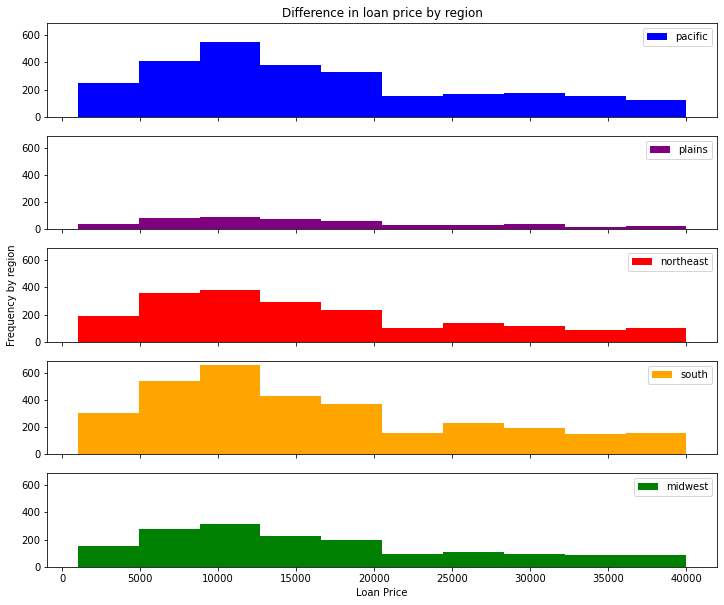

In [428]:
fig, ax = plt.subplots(5,1, figsize=(12, 10), sharex=True, sharey=True)
ax[0].hist(grouped_pacific["loan_amount"], label = "pacific", color='Blue')
ax[1].hist(grouped_plains["loan_amount"], label = "plains", color='purple')
ax[2].hist(grouped_northeast["loan_amount"], label = "northeast", color='red')
ax[3].hist(grouped_south["loan_amount"], label = "south", color='orange')
ax[4].hist(grouped_midwest["loan_amount"], label = "midwest", color='green')
plt.xlabel("Loan Price")
ax[2].set_ylabel("Frequency by region")
ax[0].set_title("Difference in loan price by region")
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
plt.show()